# **CLUSTERING**

K-MEANS y Elbow Model

In [47]:
!pip install matplotlib seaborn sklearn

In [69]:
#Importamos librerías
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline
from sklearn.cluster import KMeans

# Configuración warnings

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
import csv
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [70]:
# Importamos el dataset
df = pd.read_csv("/content/performance_clean.csv")



In [71]:
df.shape


(4282, 9)

In [72]:
df.head()

,customerid,systemloanid,loannumber,loanamount,termdays,good_bad_flag,interest,loan_interval,interest_interval
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,30000.0,30,Good,4500.0,10000,mas de 3000
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,15000.0,30,Good,2250.0,10000,menos de 3000
2,8a8588f35438fe12015444567666018e,301966580,7,20000.0,Other,Good,2250.0,10000,menos de 3000
3,8a85890754145ace015429211b513e16,301999343,3,10000.0,Other,Good,1500.0,10000,menos de 3000
4,8a858970548359cc0154883481981866,301962360,9,40000.0,30,Good,4000.0,10000,mas de 3000


In [73]:
#Hacemos una rápida visualización para ver como son los datos
print(df)

                            customerid  systemloanid  loannumber  loanamount  \
0     8a2a81a74ce8c05d014cfb32a0da1049     301994762          12     30000.0   
1     8a85886e54beabf90154c0a29ae757c0     301965204           2     15000.0   
2     8a8588f35438fe12015444567666018e     301966580           7     20000.0   
3     8a85890754145ace015429211b513e16     301999343           3     10000.0   
4     8a858970548359cc0154883481981866     301962360           9     40000.0   
...                                ...           ...         ...         ...   
4277  8a858e6d58b0cc520158beeb14b22a5a     302003163           2     10000.0   
4278  8a858ee85cf400f5015cf44ab1c42d5c     301998967           2     10000.0   
4279  8a858f365b2547f3015b284597147c94     301995576           3     10000.0   
4280  8a858f935ca09667015ca0ee3bc63f51     301977679           2     10000.0   
4281  8a858fd458639fcc015868eb14b542ad     301967124           8     30000.0   

     termdays good_bad_flag  interest  

In [74]:
#Mostramos las variables y sus datatypes
df.columns


Index(['customerid', 'systemloanid', 'loannumber', 'loanamount', 'termdays',
       'good_bad_flag', 'interest', 'loan_interval', 'interest_interval'],
      dtype='object')

In [75]:
df.dtypes

customerid            object
systemloanid           int64
loannumber             int64
loanamount           float64
termdays              object
good_bad_flag         object
interest             float64
loan_interval          int64
interest_interval     object
dtype: object

In [76]:
df = df.drop(columns=['customerid'] + ['systemloanid'])

One Hot Encoding

In [77]:
categorical_vars = set(df.columns[df.dtypes == object])
numerical_vars = set(df.columns) - categorical_vars
categorical_vars = list(categorical_vars)
numerical_vars = list(numerical_vars)

In [78]:
print(categorical_vars)
print(numerical_vars)

['interest_interval', 'good_bad_flag', 'termdays']
['loanamount', 'interest', 'loannumber', 'loan_interval']


In [79]:
#Hacemos one hot encoding
ohe = OneHotEncoder(sparse = False)
ohe_fit = ohe.fit(df[categorical_vars])
df_ohe = pd.DataFrame(ohe.fit_transform(df[categorical_vars]))
df_ohe.columns = pd.DataFrame(ohe_fit.get_feature_names())

In [80]:
#Pegamos las variables numéricas
df = pd.concat((df_ohe, df[numerical_vars].reset_index()), axis=1)

In [81]:
df.dtypes

(x0_3000,)             float64
(x0_mas de 3000,)      float64
(x0_menos de 3000,)    float64
(x1_Bad,)              float64
(x1_Good,)             float64
(x2_30,)               float64
(x2_Other,)            float64
index                    int64
loanamount             float64
interest               float64
loannumber               int64
loan_interval            int64
dtype: object

In [82]:
df=df.drop(columns=['index'])

Elbow Method para ver el número de clusters

In [83]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

Mostramos en pantalla y analizamos el **elbow plot**

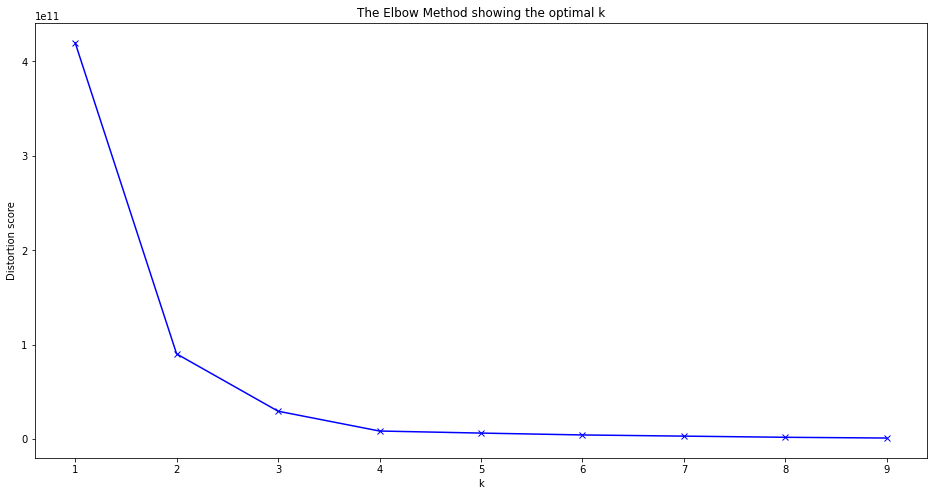

In [84]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion score')
plt.title('The Elbow Method showing the optimal k')
plt.show()

**Método K-MEANS**

In [85]:
clustering =  KMeans(n_clusters = 2, max_iter = 300)
clustering.fit(df)

KMeans(n_clusters=2)

# **Shiloutte Score**

In [87]:
#Usamos el silhouette score
range_n_clusters = list (range(2,10))
print ("Number of clusters from 2 to 9: \n", range_n_clusters)

Number of clusters from 2 to 9: 
 [2, 3, 4, 5, 6, 7, 8, 9]


In [88]:
# Ajustamos el modelo para el rango de resultados y mostramos los resultados

for n_clusters in range_n_clusters:
    clusterer = KMeans (n_clusters=n_clusters).fit(df)
    preds = clusterer.predict(df)
    centers = clusterer.cluster_centers_
    score = silhouette_score(df, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.7518611642456169)
For n_clusters = 3, silhouette score is 0.8202836288435699)
For n_clusters = 4, silhouette score is 0.8719490424865084)
For n_clusters = 5, silhouette score is 0.8832648283289436)
For n_clusters = 6, silhouette score is 0.8544643373794657)
For n_clusters = 7, silhouette score is 0.8680006882543848)
For n_clusters = 8, silhouette score is 0.9203930482232138)
For n_clusters = 9, silhouette score is 0.934987150437538)


# **Agregamos al dataset original** 

In [89]:
df['Cluster'] = clustering.labels_
df.head()

,"(x0_3000,)","(x0_mas de 3000,)","(x0_menos de 3000,)","(x1_Bad,)","(x1_Good,)","(x2_30,)","(x2_Other,)",loanamount,interest,loannumber,loan_interval,Cluster
0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,30000.0,4500.0,12,10000,1
1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,15000.0,2250.0,2,10000,0
2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,20000.0,2250.0,7,10000,0
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0,10000.0,1500.0,3,10000,0
4,0.0,1.0,0.0,0.0,1.0,1.0,0.0,40000.0,4000.0,9,10000,1


In [ ]:
df.to_csv('cluster_train.csv', sep=';', index=False)

# **Visualización clusters**

In [91]:
from sklearn.decomposition import PCA 

pca = PCA (n_components=2)
pca_df_cluster = pca.fit_transform(df)
pca_df_cluster_2 = pd.DataFrame(data=pca_df_cluster, columns = ['Componente1', 'Componente2'])
pca_columna = pd.concat([pca_df_cluster_2, df[['Cluster']]], axis=1)


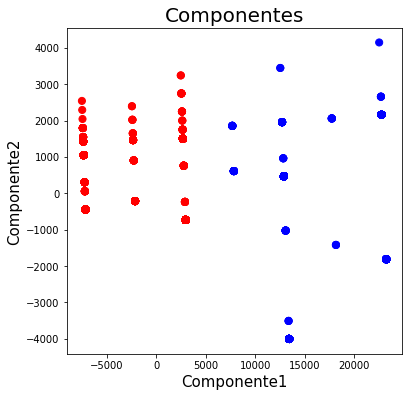

In [92]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente1', fontsize = 15)
ax.set_ylabel('Componente2', fontsize = 15)
ax.set_title('Componentes', fontsize = 20)

color_theme = np.array(["red", "blue", "black"])
ax.scatter(x = pca_columna.Componente1, y = pca_columna.Componente2,
          c=color_theme[pca_columna.Cluster], s = 50)
plt.show()

Agregamos los clusters al dataset test

In [93]:
df = pd.read_csv("/content/performance_clean.csv",sep=';')
test, id_column = df.drop(['customerid'],axis=1), df['customerid']
res = clustering.predict(test)
test['customerid'], test['Cluster'] = id_column, res
test.head()

FileNotFoundError: ignored

In [ ]:
test.to_csv("cluster_test.csv",sep=';',index=False)